In [1]:
import numpy as np
import h5py
import pandas as pd

import matplotlib.pyplot as plt
from jupyterthemes import jtplot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

import sys
path = ''
sys.path.insert(0, path)

## Background from Workflow triggers

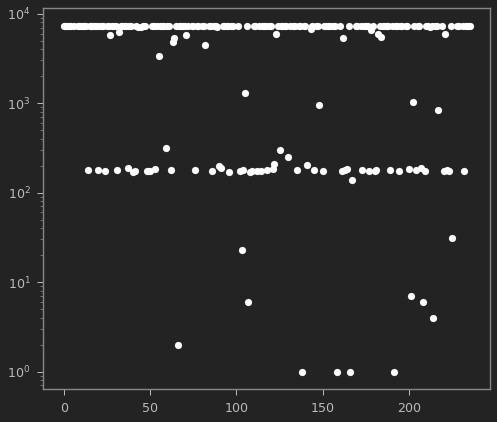

In [2]:
wf = h5py.File(path + 'Coinc_wf.hdf5')

trig_count = np.zeros(236)
for i in range(236):
    trig_count[i] = len(wf['Ltrig'][str(i)])
    
    
    
plt.scatter(np.arange(0,236), trig_count, c ='w')
plt.yscale('log')
plt.show()

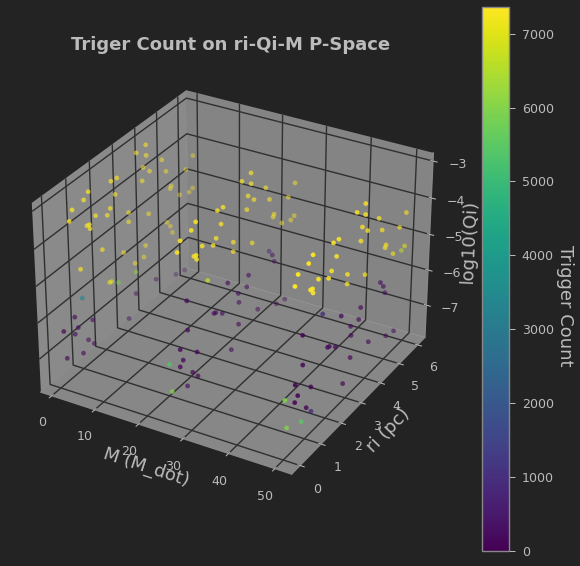

In [33]:
######### This part only works for jupyter notebook. This needs to be a comment for other consoles
#%matplotlib notebook
#####################################################

df = pd.read_csv(path + 'Horizon.csv')
df.drop(['snr', 'newsnr'], axis=1, inplace=True)
df['Trigs'] = trig_count
df2 = df[df['M'] != 10]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(df2['M'], df2['ri'], df2['Qi'], c=df2['Trigs'])#, norm=matplotlib.colors.LogNorm(vmin=DF['lDh'].min(), vmax=DF['lDh'].max()))

cbar = fig.colorbar(p, ax=ax)
cbar.set_label('Trigger Count', fontsize=18, rotation=270,labelpad=20, y=0.45)
ax.set_ylabel('ri (pc)', fontsize=18)
ax.set_zlabel('log10(Qi)', fontsize=18)
ax.set_xlabel('M (M_dot)', fontsize=18)
ax.set_title('Triger Count on ri-Qi-M P-Space', fontsize=18, fontweight='bold')
ax.set_zlim(df['Qi'].min()*1.05, df['Qi'].max()*0.95)
plt.show()


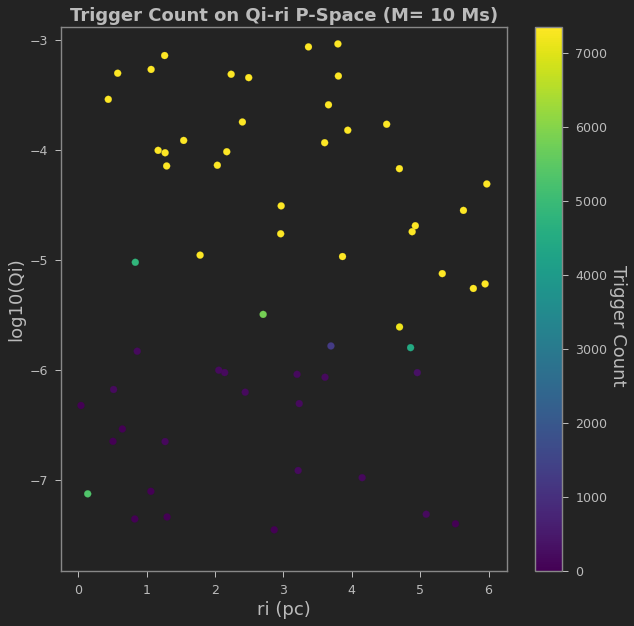

In [34]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

DF = df[df['M'] == 10]
p = ax.scatter(DF['ri'], DF['Qi'], c=DF['Trigs'])#, norm=matplotlib.colors.LogNorm(vmin=DF['lDh'].min(), vmax=DF['lDh'].max()))

cbar = fig.colorbar(p, ax=ax)
cbar.set_label('Trigger Count', fontsize=18, rotation=270,labelpad=20, y=0.45)
ax.set_xlabel('ri (pc)', fontsize=18)
ax.set_ylabel('log10(Qi)', fontsize=18)
ax.set_title('Trigger Count on Qi-ri P-Space (M= 10 Ms)', fontsize=18, fontweight='bold')
ax.set_ylim(df['Qi'].min()*1.05, df['Qi'].max()*0.95)
plt.show()

/home/shrey/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


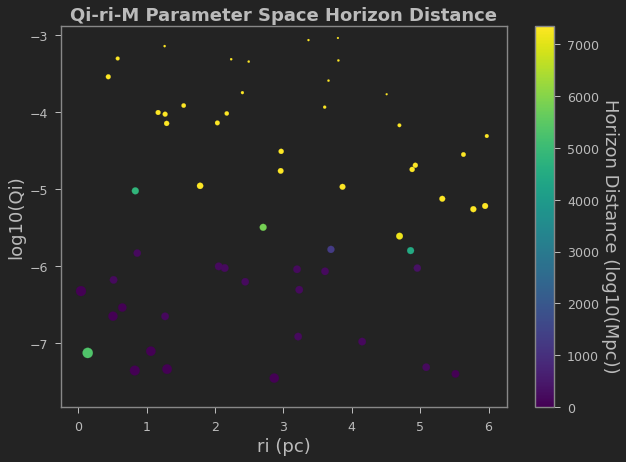

In [5]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)

DF = df[df['M'] == 10]
p = ax.scatter(DF['ri'], DF['Qi'], c=DF['Trigs'], s=np.array(DF['Dh'])*10+60)#, norm=matplotlib.colors.LogNorm(vmin=DF['lDh'].min(), vmax=DF['lDh'].max()))

cbar = fig.colorbar(p, ax=ax)
cbar.set_label('Horizon Distance (log10(Mpc))', fontsize=18, rotation=270,labelpad=20, y=0.45)
ax.set_xlabel('ri (pc)', fontsize=18)
ax.set_ylabel('log10(Qi)', fontsize=18)
ax.set_title('Qi-ri-M Parameter Space Horizon Distance', fontsize=18, fontweight='bold')
ax.set_ylim(df['Qi'].min()*1.05, df['Qi'].max()*0.95)
plt.show()

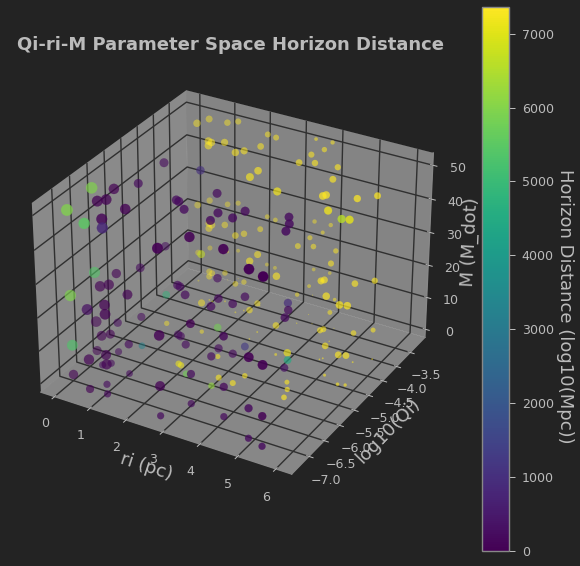

In [6]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(df['ri'], df['Qi'], df['M'], c=df['Trigs'], s=np.array(df['Dh'])*10-df['Dh'].min()*10)#, norm=matplotlib.colors.LogNorm(vmin=DF['lDh'].min(), vmax=DF['lDh'].max()))

cbar = fig.colorbar(p, ax=ax)
cbar.set_label('Horizon Distance (log10(Mpc))', fontsize=18, rotation=270,labelpad=20, y=0.45)
ax.set_xlabel('ri (pc)', fontsize=18)
ax.set_ylabel('log10(Qi)', fontsize=18)
ax.set_zlabel('M (M_dot)', fontsize=18)
ax.set_title('Qi-ri-M Parameter Space Horizon Distance', fontsize=18, fontweight='bold')
ax.set_ylim(df['Qi'].min(), df['Qi'].max())
plt.show()


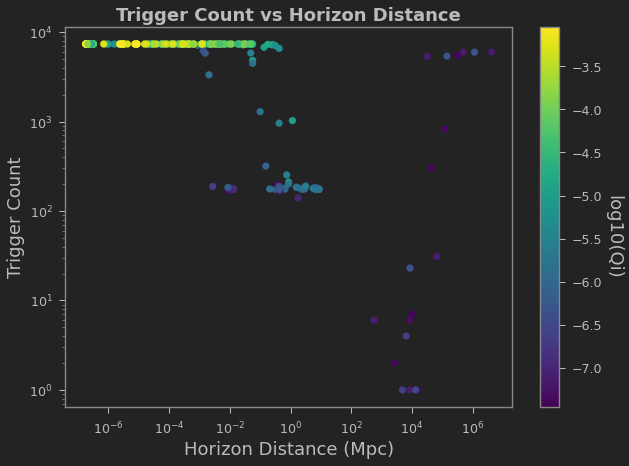

In [7]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)

p = plt.scatter(x=10**df['Dh'], y=df['Trigs'], c=df['Qi'])
cbar = fig.colorbar(p, ax=ax)
cbar.set_label('log10(Qi)', fontsize=18, rotation=270,labelpad=20, y=0.45)
ax.set_xlabel('Horizon Distance (Mpc)', fontsize=18)
ax.set_ylabel('Trigger Count', fontsize=18)
ax.set_title('Trigger Count vs Horizon Distance', fontsize=18, fontweight='bold')
plt.xscale('log')
plt.yscale('log')
plt.show()

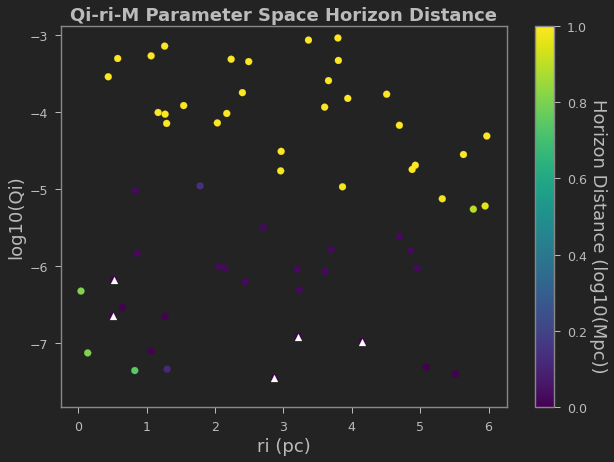

In [10]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)

DF = df[df['M'] == 50]
p = ax.scatter(DF['ri'], DF['Qi'], c=DF['Trigs'])
DF = DF[DF['Trigs'] == 0]
p = ax.scatter(DF['ri'], DF['Qi'], c='w', marker='^')#, norm=matplotlib.colors.LogNorm(vmin=DF['lDh'].min(), vmax=DF['lDh'].max()))

cbar = fig.colorbar(p, ax=ax)
cbar.set_label('Horizon Distance (log10(Mpc))', fontsize=18, rotation=270,labelpad=20, y=0.45)
ax.set_xlabel('ri (pc)', fontsize=18)
ax.set_ylabel('log10(Qi)', fontsize=18)
ax.set_title('Qi-ri-M Parameter Space Horizon Distance', fontsize=18, fontweight='bold')
ax.set_ylim(df['Qi'].min()*1.05, df['Qi'].max()*0.95)
plt.show()

In [11]:
Len = df.shape[0]
## roof
roof = df['Trigs'].max()
perc = df[df['Trigs'] == roof].shape[0]/Len*100
print(roof, perc)

## floor
floor = df['Trigs'].min()
perc = df[df['Trigs'] == floor].shape[0]/Len*100
print(floor, perc)

7358.0 0.423728813559322
0.0 8.47457627118644


In [12]:
DF = df[df['Trigs'] == floor]
DF

,M,Qi,id,ri,Dh,Trigs
5,1,-7.129650,5,0.139929,1.56250,0.0
7,1,-7.358345,7,0.828026,-0.43750,0.0
44,1,-6.326472,44,0.041812,1.00000,0.0
73,10,-6.540045,73,0.646538,0.81250,0.0
79,10,-6.652452,79,0.509408,2.37500,0.0
83,10,-7.401773,83,5.516502,-0.25000,0.0
99,10,-7.339934,99,1.300346,3.03125,0.0
100,10,-7.456505,100,2.866954,2.50000,0.0
132,25,-6.540045,132,0.646538,3.25000,0.0
142,25,-7.401773,142,5.516502,2.56250,0.0


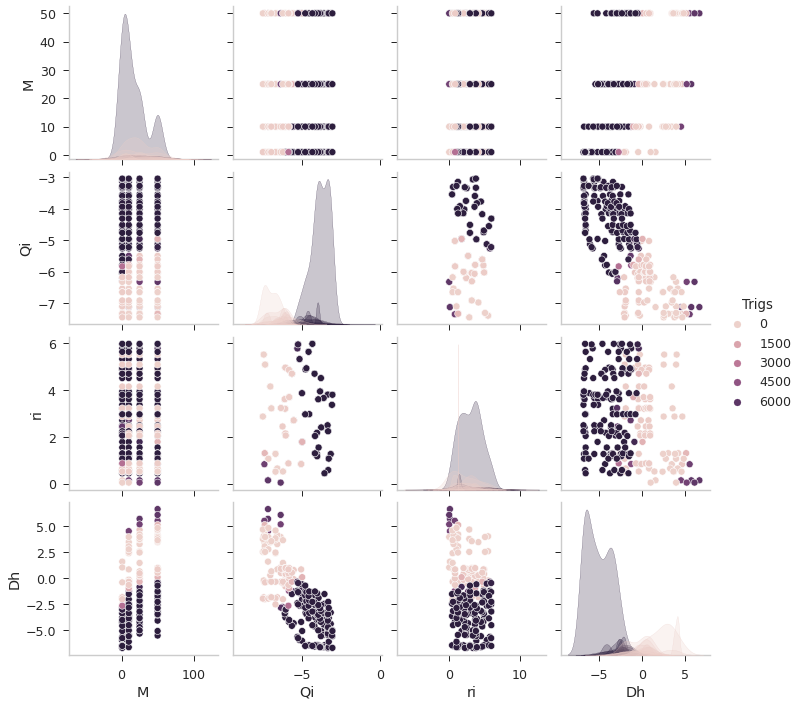

In [19]:
import seaborn as sns
jtplot.style(context='notebook', ticks=True, grid=False)
sns.pairplot(df.drop(['id'], axis=1), hue = 'Trigs')
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

### There is a roof for triggers at 7766 (~35% triggers count). I want to cross-check this with manual calculations.

My manual calculation used a ltt (light travel time) = 0.0105 (actual light travel time) + 2/256 (two least counts for time). To cross-check, I'll see what ltt does the pipeline use

In [20]:
ltt = []
for i in range(236):

    Ltrig = np.array(wf['Ltrig'][str(i)])
    Htrig = np.array(wf['Htrig'][str(i)])
    if len(Ltrig) > 0:
        ltt.append(max(abs(Ltrig - Htrig)))

print(min(ltt), max(ltt))

0.0078125 0.0078125


In [21]:
dt = 1/256
for i in range(4):
    print(i*dt)

0.0
0.00390625
0.0078125
0.01171875


The very low light travel time is due to the sampling rate (3*dt < llt < 4*dt). To properly compare the worflow and manual trigs, I will lower the llt to 3*dt for manual trigs.

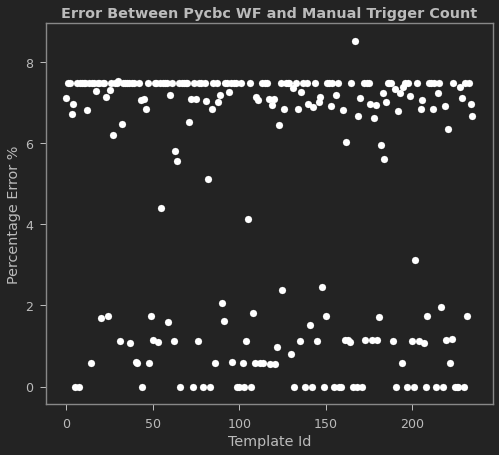

[5, 7, 44, 73, 79, 83, 99, 100, 132, 142, 149, 155, 159, 168, 171, 197, 218, 226, 227, 230]


In [29]:
man = h5py.File(path + 'Coinc_manual.h5py')
Lm = np.zeros(236)
Lw = np.zeros(236)
diff = np.zeros(236)
trigs_0 = []

for i in range(236):
    
    mtrig = np.array(man['Ltrig'][str(i)])
    tof = np.array(man['tof'][str(i)])
    mtrig = [mtrig[i] for i in range(len(mtrig)) if tof[i] < 0.007813]
    
    Lm[i] = len(mtrig)
    Lw[i] = len(wf['Ltrig'][str(i)])
    if Lm[i] == 0 and Lw[i] == 0:
        trigs_0.append(i)
    else:
        diff[i] = abs(Lm[i]-Lw[i])/Lm[i]*100
    
    
    
plt.scatter(np.arange(0,236), diff, c ='w')
plt.xlabel('Template Id')
plt.ylabel('Percentage Error %')
plt.title('Error Between Pycbc WF and Manual Trigger Count', fontweight='bold')
plt.show()
print(trigs_0)

The manual results give less triggers. I'll have to check this

Atleast, the manual calcuation also have a roof (at ~7000) just like the workflow. This gives me some more confidence about the workflow results